# Eat Safe, Love

## Notebook Set Up

In [9]:
# Import dependencies
from pymongo import MongoClient
from pprint import pprint
import pandas as pd


In [2]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [3]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [4]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [5]:
# assign the collection to a variable
establishments = db['establishments']

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [7]:
# Find the establishments with a hygiene score of 20
query = {"scores.Hygiene": 20}

# Use count_documents to display the number of documents in the result
print("Establishments With a Hygiene Score of 20:", establishments.count_documents(query))
print()

# Display the first document in the results using pprint
pprint(establishments.find_one(query))

Establishments With a Hygiene Score of 20: 41

{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': 0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('64b0845b075e9a602bca4649'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self'}],
 'met

In [22]:
# Convert the result to a Pandas DataFrame
score_data = establishments.find(query)
score_df = pd.DataFrame(score_data)

# Display the number of rows in the DataFrame
print("Rows:")
print(score_df.shape[0])

# Display the first 10 rows of the DataFrame

score_df.head(10)






Rows:
41


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,64b0845b075e9a602bca4649,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,64b0845b075e9a602bca49ca,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,64b0845b075e9a602bca4cd4,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,64b0845b075e9a602bca4ec2,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,64b0845b075e9a602bca4ed1,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,64b0845c075e9a602bca5870,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,64b0845c075e9a602bca5a91,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,64b0845d075e9a602bca6fbc,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,64b0845d075e9a602bca7400,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [33]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
rvalue_query = {"LocalAuthorityName": {"$regex": "London"}, "RatingValue": {"$gte": 4}}

# Use count_documents to display the number of documents in the result
print("Count:", establishments.count_documents(rvalue_query))
print()

# Display the first document in the results using pprint
first_doc = establishments.find(rvalue_query)

pprint(first_doc[1])









Count: 33

{'AddressLine1': 'Cherry Garden Pier',
 'AddressLine2': 'Cherry Garden Street Rotherhithe',
 'AddressLine3': 'Charlton',
 'AddressLine4': '',
 'BusinessName': 'Mv City Cruises Erasmus',
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.8731788858,
 'FHRSID': 1130836,
 'LocalAuthorityBusinessID': 'PI/000034075',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'TN4 8HR',
 'RatingDate': '2021-05-14T00:00:00',
 'RatingKey': 'fhrs_5_en-gb',
 'RatingValue': 5,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('64b0845c075e9a602bca638a'),
 'geocode': {'latitude': 51.1236228942871, 'longitude': 0.249255999922752},
 'links': [{'href': 'http://api.ratings.food.gov.uk/esta

In [35]:
# Convert the result to a Pandas DataFrame
score_df = pd.DataFrame(first_doc)


# Display the number of rows in the DataFrame
print("Rows:", score_df.shape[0])


# Display the first 10 rows of the DataFrame
score_df.head(10)




Rows: 33


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,64b0845c075e9a602bca6064,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,64b0845c075e9a602bca638a,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,64b0845d075e9a602bca6ed7,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,64b0845d075e9a602bca7cd7,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,64b0845d075e9a602bca7cd8,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,64b0845d075e9a602bca83e0,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,64b0845f075e9a602bcaa4ee,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,64b0845f075e9a602bcaa8b5,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.048006, 'latitude': 51.503733}",,4649.173485,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,64b0845f

### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [40]:
# Search within 0.01 degree on either side of the latitude and longitude.
# Rating value must equal 5
# Sort by hygiene score

degree_search = 0.01
latitude = 51.49014200
longitude = 0.08384000

top5 = {'geocode.latitude': {'$gte':latitude-degree_search, '$lte': latitude+degree_search},
                     'geocode.longitude': {'$gte':longitude-degree_search, '$lte': longitude+degree_search},
                     'RatingValue': 5}
sort = [('score.Hygiene', 1)]
fields = {'FHRSID':1,'BusinessName':1, 'BusinessType':1, 'geocode.latitude':1, 'geocode.longitude':1, 'scores.Hygiene':1, 'RatingValue':1}
limit = 5

# Print the results
top5_nearby_results = establishments.find(top5, fields).sort(sort).limit(limit)
for top5_result in top5_nearby_results:
    pprint(top5_result)

{'BusinessName': 'Volunteer',
 'BusinessType': 'Pub/bar/nightclub',
 'FHRSID': 694609,
 'RatingValue': 5,
 '_id': ObjectId('64b0845f075e9a602bca9ea8'),
 'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
 'scores': {'Hygiene': 0}}
{'BusinessName': 'Plumstead Manor Nursery',
 'BusinessType': 'Caring Premises',
 'FHRSID': 695241,
 'RatingValue': 5,
 '_id': ObjectId('64b0845f075e9a602bca9ec0'),
 'geocode': {'latitude': 51.481517791748, 'longitude': 0.0859939977526665},
 'scores': {'Hygiene': 0}}
{'BusinessName': 'Iceland',
 'BusinessType': 'Retailers - supermarkets/hypermarkets',
 'FHRSID': 695223,
 'RatingValue': 5,
 '_id': ObjectId('64b0845f075e9a602bca9e7b'),
 'geocode': {'latitude': 51.4871482849121, 'longitude': 0.0924199968576431},
 'scores': {'Hygiene': 0}}
{'BusinessName': 'TIWA N TIWA African Restaurant Ltd',
 'BusinessType': 'Restaurant/Cafe/Canteen',
 'FHRSID': 1069652,
 'RatingValue': 5,
 '_id': ObjectId('64b0845f075e9a602bca9e54'),
 'geocode': {'latitude': 51.4870351,

In [45]:
# Convert result to Pandas DataFrame
top5_list = establishments.find(top5_nearby_query, fields).sort(sort).limit(limit)
top5_list_df = pd.DataFrame(top5_list)
print(top5_list_df.shape)
top5_list_df.head()

(5, 7)


,_id,FHRSID,BusinessName,BusinessType,RatingValue,scores,geocode
0,64b0845f075e9a602bca9ea8,694609,Volunteer,Pub/bar/nightclub,5,{'Hygiene': 0},"{'longitude': 0.09208, 'latitude': 51.4873437}"
1,64b0845f075e9a602bca9ec0,695241,Plumstead Manor Nursery,Caring Premises,5,{'Hygiene': 0},"{'longitude': 0.0859939977526665, 'latitude': ..."
2,64b0845f075e9a602bca9e7b,695223,Iceland,Retailers - supermarkets/hypermarkets,5,{'Hygiene': 0},"{'longitude': 0.0924199968576431, 'latitude': ..."
3,64b0845f075e9a602bca9e54,1069652,TIWA N TIWA African Restaurant Ltd,Restaurant/Cafe/Canteen,5,{'Hygiene': 5},"{'longitude': 0.0927429, 'latitude': 51.4870351}"
4,64b0845f075e9a602bca9e8b,1380578,Howe and Co Fish and Chips - Van 17,Mobile caterer,5,{'Hygiene': 0},"{'longitude': 0.0925370007753372, 'latitude': ..."


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [46]:
# Create a pipeline that: 
# 1. Matches establishments with a hygiene score of 0
    # SELECT
    #     localAuth,
    #     count(*) as num_estabs
    # FROM
    #     uk_food
    # WHERE
    #     hygeine = 0
    # GROUP BY
    #     localAuthority
    # ORDER BY
    #     num_estabs desc

# 2. Groups that matches by Local Authority
# 3. Sorts the matches from highest to lowest
# Print the number of documents in the result
# Print the first 10 results

query = [
    {"$match": 
        {"scores.Hygiene": 0}
    },
    {"$group": 
        {'_id': "$LocalAuthorityName",
         "num_items": {"$sum": 1}
        }
    },
    {"$sort": {"num_items": -1}}
]


data = list(establishments.aggregate(query))
print(f"There are {len(data)} Local Authorities with at least one Restaurant with a Hygiene of 0")

pprint(data[0:10])

There are 55 Local Authorities with at least one Restaurant with a Hygiene of 0
[{'_id': 'Thanet', 'num_items': 1130},
 {'_id': 'Greenwich', 'num_items': 882},
 {'_id': 'Maidstone', 'num_items': 713},
 {'_id': 'Newham', 'num_items': 711},
 {'_id': 'Swale', 'num_items': 686},
 {'_id': 'Chelmsford', 'num_items': 680},
 {'_id': 'Medway', 'num_items': 672},
 {'_id': 'Bexley', 'num_items': 607},
 {'_id': 'Southend-On-Sea', 'num_items': 586},
 {'_id': 'Tendring', 'num_items': 542}]


In [49]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(data)

# Display the number of rows in the DataFrame
print(df.shape)

# Display the first 10 rows of the DataFrame
df.head(10)

(55, 2)


,_id,num_items
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


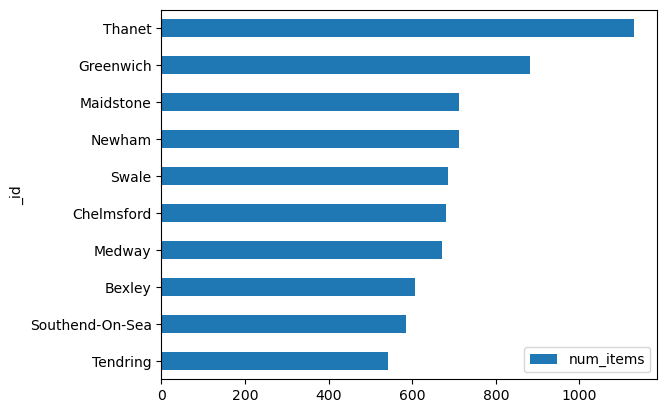

In [51]:
import matplotlib.pyplot as plt

df.sort_values(by="num_items").tail(10).plot(kind="barh", y="num_items", x="_id")
plt.show()